In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras as k
from scipy.stats import norm
import matplotlib.mlab as mlab

Using TensorFlow backend.


In [2]:
def changeFigSize(newDims):
    fig_size = plt.rcParams['figure.figsize']
    print(f"Current size is {fig_size}")
    plt.rcParams['figure.figsize'] = newDims
    print(f"New size is {plt.rcParams['figure.figsize']}")

(array([], dtype=int64), array([], dtype=int64))
mu and sigma are 35.6744262295082 and 15.601064611766539


c:\users\210061884\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:21: MatplotlibDeprecationWarning: scipy.stats.norm.pdf


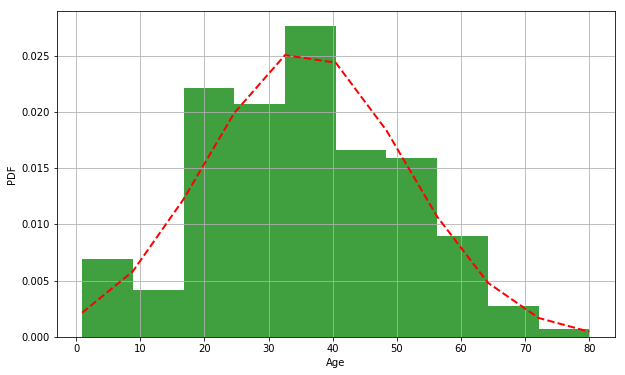

In [94]:
# Import data with pandas
train = pd.read_csv('train.csv')
train.isnull()
train = train.dropna(how='any')
print(np.where(train.isnull()))

P_id = train['PassengerId']
Survived = train['Survived']
P_class = train['Pclass']
P_name = train['Name']
P_sex = train['Sex']
P_age = train['Age']

(mu, sigma) = norm.fit(P_age)

print(f"mu and sigma are {mu} and {sigma}")

fig = plt.figure()
n, bins, patches = plt.hist(P_age, bins='auto', density='true', facecolor='green', alpha=0.75)

fit = mlab.normpdf(bins, mu, sigma)
l = plt.plot(bins,fit, 'r--',linewidth=2)
plt.xlabel('Age')
plt.ylabel('PDF')

#changeFigSize([10,6])
plt.grid(True)
plt.show()
plt.close()


In [98]:

a = pd.DataFrame({'data': np.array([1,2,3,13,8,20,13,22,50,60,75,45,30,22,11,12,13,14,15,16,71,18])})

a = pd.cut(a['data'],8, retbins=True)
print(a[1][1])
print(a[1])


10.25
[ 0.926 10.25  19.5   28.75  38.    47.25  56.5   65.75  75.   ]
